## Imports

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import mlflow

from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import cross_validate
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

## Load data and cleaning

In [2]:
df = pd.read_csv('data/AB_NYC_2019.csv')
df

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48890,36484665,Charming one bedroom - newly renovated rowhouse,8232441,Sabrina,Brooklyn,Bedford-Stuyvesant,40.67853,-73.94995,Private room,70,2,0,NaN,NaN,2,9
48891,36485057,Affordable room in Bushwick/East Williamsburg,6570630,Marisol,Brooklyn,Bushwick,40.70184,-73.93317,Private room,40,4,0,NaN,NaN,2,36
48892,36485431,Sunny Studio at Historical Neighborhood,23492952,Ilgar & Aysel,Manhattan,Harlem,40.81475,-73.94867,Entire home/apt,115,10,0,NaN,NaN,1,27
48893,36485609,43rd St. Time Square-cozy single bed,30985759,Taz,Manhattan,Hell's Kitchen,40.75751,-73.99112,Shared room,55,1,0,NaN,NaN,6,2


In [3]:
df.drop(columns=['name', 'host_name', 'id', 'host_id'], inplace=True)

In [4]:
df['last_review'] = pd.to_datetime(df['last_review'])

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 12 columns):
 #   Column                          Non-Null Count  Dtype         
---  ------                          --------------  -----         
 0   neighbourhood_group             48895 non-null  object        
 1   neighbourhood                   48895 non-null  object        
 2   latitude                        48895 non-null  float64       
 3   longitude                       48895 non-null  float64       
 4   room_type                       48895 non-null  object        
 5   price                           48895 non-null  int64         
 6   minimum_nights                  48895 non-null  int64         
 7   number_of_reviews               48895 non-null  int64         
 8   last_review                     38843 non-null  datetime64[ns]
 9   reviews_per_month               38843 non-null  float64       
 10  calculated_host_listings_count  48895 non-null  int64         
 11  av

In [6]:
df

,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaT,NaN,1,365
3,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...
48890,Brooklyn,Bedford-Stuyvesant,40.67853,-73.94995,Private room,70,2,0,NaT,NaN,2,9
48891,Brooklyn,Bushwick,40.70184,-73.93317,Private room,40,4,0,NaT,NaN,2,36
48892,Manhattan,Harlem,40.81475,-73.94867,Entire home/apt,115,10,0,NaT,NaN,1,27
48893,Manhattan,Hell's Kitchen,40.75751,-73.99112,Shared room,55,1,0,NaT,NaN,6,2


## Engineering

In [7]:
df['last_review'].min(), df['last_review'].max()

(Timestamp('2011-03-28 00:00:00'), Timestamp('2019-07-08 00:00:00'))

In [8]:
last_day = df['last_review'].max()
df['days_since_last_review'] = df['last_review'].apply(lambda x: (last_day - x).days)
df

,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,days_since_last_review
0,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365,262.0
1,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355,48.0
2,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaT,NaN,1,365,NaN
3,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194,3.0
4,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0,231.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
48890,Brooklyn,Bedford-Stuyvesant,40.67853,-73.94995,Private room,70,2,0,NaT,NaN,2,9,NaN
48891,Brooklyn,Bushwick,40.70184,-73.93317,Private room,40,4,0,NaT,NaN,2,36,NaN
48892,Manhattan,Harlem,40.81475,-73.94867,Entire home/apt,115,10,0,NaT,NaN,1,27,NaN
48893,Manhattan,Hell's Kitchen,40.75751,-73.99112,Shared room,55,1,0,NaT,NaN,6,2,NaN


In [9]:
df[['neighbourhood_group', 'last_review']].query("last_review.isna()").fillna(1).groupby(by='neighbourhood_group').count()

,last_review
neighbourhood_group,
Bronx,215
Brooklyn,3657
Manhattan,5029
Queens,1092
Staten Island,59


In [10]:
df[['neighbourhood_group', 'last_review']].query("~last_review.isna()").fillna(1).groupby(by='neighbourhood_group').count()

,last_review
neighbourhood_group,
Bronx,876
Brooklyn,16447
Manhattan,16632
Queens,4574
Staten Island,314


In [11]:
df.dropna(inplace=True)

/tmp/ipykernel_3338/3759123873.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(method='spearman'), annot=True)


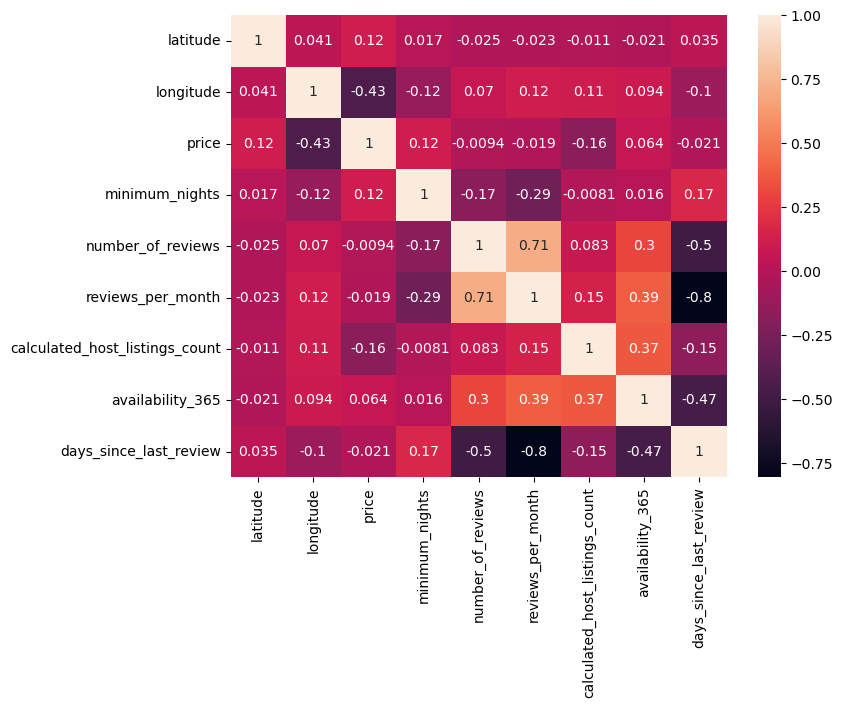

In [12]:
plt.figure(figsize=(8, 6))
sns.heatmap(df.corr(method='spearman'), annot=True)
plt.xticks(rotation=90);

In [13]:
df = pd.concat([df, pd.get_dummies(df['neighbourhood_group']), 
               pd.get_dummies(df['neighbourhood']), 
               pd.get_dummies(df['room_type'])], 
               axis=1)

In [14]:
df.drop(columns=['neighbourhood_group', 'neighbourhood', 'room_type', 'last_review'], inplace=True)
df

,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365,days_since_last_review,Bronx,...,Williamsbridge,Williamsburg,Willowbrook,Windsor Terrace,Woodhaven,Woodlawn,Woodside,Entire home/apt,Private room,Shared room
0,40.64749,-73.97237,149,1,9,0.21,6,365,262.0,0,...,0,0,0,0,0,0,0,0,1,0
1,40.75362,-73.98377,225,1,45,0.38,2,355,48.0,0,...,0,0,0,0,0,0,0,1,0,0
3,40.68514,-73.95976,89,1,270,4.64,1,194,3.0,0,...,0,0,0,0,0,0,0,1,0,0
4,40.79851,-73.94399,80,10,9,0.10,1,0,231.0,0,...,0,0,0,0,0,0,0,1,0,0
5,40.74767,-73.97500,200,3,74,0.59,1,129,16.0,0,...,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48782,40.78099,-73.95366,129,1,1,1.00,1,147,1.0,0,...,0,0,0,0,0,0,0,0,1,0
48790,40.75104,-73.81459,45,1,1,1.00,6,339,1.0,0,...,0,0,0,0,0,0,0,0,1,0
48799,40.54179,-74.14275,235,1,1,1.00,1,87,1.0,0,...,0,0,0,0,0,0,0,0,1,0
48805,40.80787,-73.92400,100,1,2,2.00,1,40,1.0,1,...,0,0,0,0,0,0,0,1,0,0


## Prediction

### Price

In [15]:
x = df.drop(columns='price')
y = df['price'].ravel()

#### Random Forest

In [18]:
params = {'min_samples_split': [2, 4, 6, 8, 10], 'min_samples_leaf': [2, 4, 6, 8, 10], 'bootstrap': [True, False],
          'max_features': ['sqrt', 'log2', 1, 0.75, 0.5], 'n_estimators': [100, 200, 300]}
scoring = ['neg_root_mean_squared_error', 'neg_mean_absolute_error', 'r2']

grid_search = GridSearchCV(RandomForestRegressor(), params, cv=5, scoring=scoring, refit=scoring[0], n_jobs=9)
grid_search.fit(x, y);

Fitting 5 folds for each of 750 candidates, totalling 3750 fits
[CV] END bootstrap=True, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=200; total time=  13.8s
[CV] END bootstrap=True, max_features=sqrt, min_samples_leaf=2, min_samples_split=4, n_estimators=100; total time=   6.9s
[CV] END bootstrap=True, max_features=sqrt, min_samples_leaf=2, min_samples_split=4, n_estimators=100; total time=   6.9s
[CV] END bootstrap=True, max_features=sqrt, min_samples_leaf=2, min_samples_split=4, n_estimators=300; total time=  21.3s
[CV] END bootstrap=True, max_features=sqrt, min_samples_leaf=2, min_samples_split=6, n_estimators=300; total time=  21.5s
[CV] END bootstrap=True, max_features=sqrt, min_samples_leaf=2, min_samples_split=8, n_estimators=200; total time=  13.6s
[CV] END bootstrap=True, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=100; total time=   6.9s
[CV] END bootstrap=True, max_features=sqrt, min_samples_leaf=2, min_samples_split

In [22]:
print(grid_search.best_params_)

best = grid_search.best_estimator_
print("RMSE for Random Forest", grid_search.best_score_ * -1)

{'bootstrap': False, 'max_features': 'sqrt', 'min_samples_leaf': 2, 'min_samples_split': 4, 'n_estimators': 300}
RMSE for Random Forest 176.2710726901287


In [28]:
x_train, x_test, y_train, y_test = train_test_split(x, y, train_size=0.8, random_state=10)
len(x_train), len(x_test)

(31074, 7769)

In [29]:
model = RandomForestRegressor(min_samples_split=4, min_samples_leaf=2, bootstrap=False, max_features='sqrt', n_estimators=300, , n_jobs=5)
model.fit(x_train, y_train.ravel())

RandomForestRegressor(bootstrap=False, max_features='sqrt', min_samples_leaf=2,
                      min_samples_split=4, n_estimators=300)

In [30]:
y_pred = model.predict(x_test)

In [31]:
print("rmse:", mean_squared_error(y_test, y_pred) ** (1/2))
print("mae:", mean_absolute_error(y_test, y_pred))
print("r2:", r2_score(y_test, y_pred))

rmse: 105.59945007437722
mae: 49.48618027149348
r2: 0.36229029048513794
